In [1]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 1.8 MB/s eta 0:00:00


  0%|          | 0/101 [00:00<?, ?it/s]

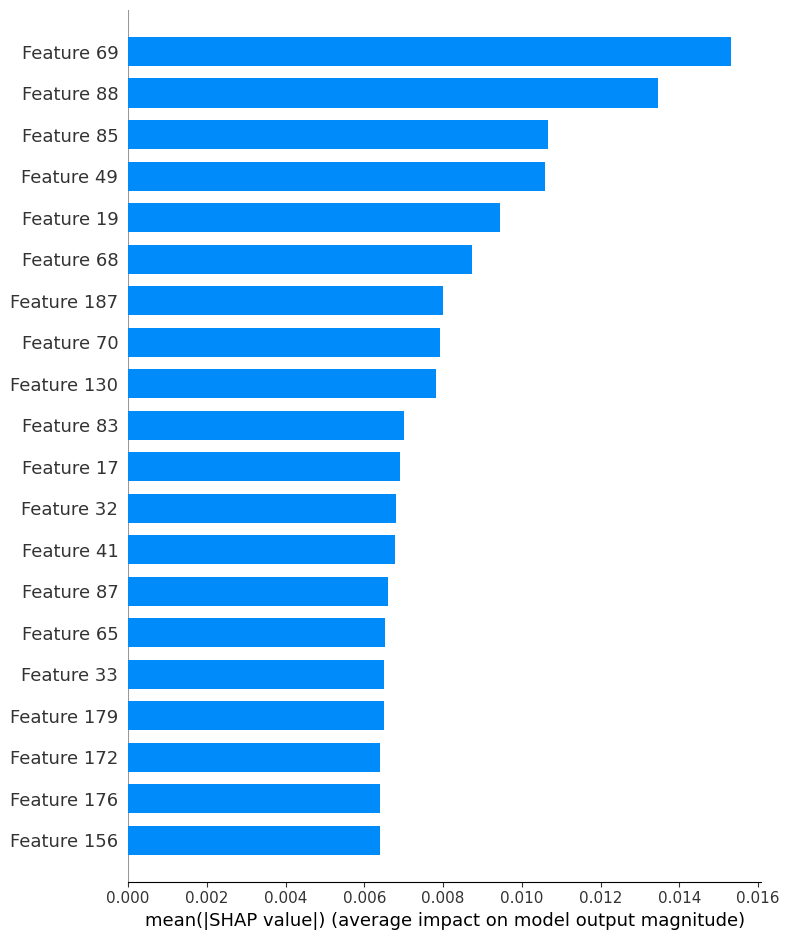

In [2]:
#SHAP
#!pip install shap
import shap
import pickle

# Carregar o modelo do arquivo
with open('modeloGB.pkl', 'rb') as file:
    model = pickle.load(file)

with open('X_trainGB.pickle', 'rb') as file:
    X_train = pickle.load(file)

with open('X_testGB.pickle', 'rb') as file:
    X_test = pickle.load(file)


# Usar KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)

# Visualizar a importância das features para a primeira classe como exemplo
shap.summary_plot(shap_values[0], X_test, plot_type="bar")

In [3]:
import numpy as np

important_features_index = np.argsort(-np.abs(np.array(shap_values).mean(0)).mean(0))[:10]

# Selecionar os dados apenas com as features importantes
X_train_selected = X_train[:, important_features_index]
X_test_selected = X_test[:, important_features_index]

In [4]:
import pandas as pd


dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Átomos', axis=1)
dataset = dataset.drop('DOI', axis=1)


nomes_das_colunas = dataset.columns[important_features_index]

print("Nomes das colunas correspondentes:", nomes_das_colunas.tolist())

lista_classes = model.classes_
#print(lista_classes)

#primeira rodada SHAP Nomes das colunas correspondentes: ['electronegativity_ghosh_soma', 'vel_of_sound_soma',
#'poissons_ratio_desvio', 'atomic_ea_media', 'supercond_temp_maximo', 'atomic_spacegroupnum_desvio',
#'atomic_orbital_radii_soma', 'brinell_hardness_desvio', 'entropia-oxidos_media', 'coeff_of_lte_maximo']

Nomes das colunas correspondentes: ['density_of_solid_minimo', 'van_der_waals_rad_minimo', 'melting_point_soma', 'refract_index_desvio', 'entropia-oxidos_soma', 'atomic_spacegroupnum_maximo', 'liquid_range_media', 'atomic_orbital_radii_media', 'electrical_resist_desvio', 'atomic_en_sanderson_minimo']


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



with open('y_trainGB.pickle', 'rb') as file:
    y_train = pickle.load(file)

################################################################################# Tuning hiperparameters

#Implementar gradient Booting
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

param_grid = {

        'loss' : ['log_loss'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'max_features' : ['sqrt', 'log2'],
        'max_leaf_nodes' : [7, 9,12,14, 16],
        'n_estimators' : [50,100,200,500],
        'max_depth' : [3,5,7,9]

  }

modelGB = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = modelGB, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)



grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
{'criterion': 'squared_error', 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 12, 'n_estimators': 200}


In [ ]:
with open('X_test_selected.pickle', 'wb') as f:
  pickle.dump(X_test_selected, f)

with open('X_train_selected.pickle', 'wb') as f:
  pickle.dump(X_train_selected, f)

with open('y_testGB.pickle', 'rb') as file:
    y_test = pickle.load(file)

In [21]:
l=0
a=0
while l< 2000:

  modelGB = GradientBoostingClassifier(
        criterion='squared_error', loss= 'log_loss', max_depth= 5,
        max_features= 'sqrt', max_leaf_nodes= 12, n_estimators= 200

    )

  modelGB.fit(X_train_selected,y_train)


  x = accuracy_score(y_test, modelGB.predict(X_test_selected), sample_weight=None)
  print(float(x))

  if x > a:
    a = x
    k = modelGB

  l = l +1

0.6732673267326733
0.6732673267326733
0.6732673267326733
0.6336633663366337
0.6534653465346535
0.6831683168316832
0.6633663366336634
0.6633663366336634
0.6534653465346535
0.6732673267326733
0.6831683168316832
0.6534653465346535
0.6633663366336634
0.6732673267326733
0.6732673267326733
0.6633663366336634
0.6534653465346535
0.6732673267326733
0.6633663366336634
0.6633663366336634
0.6732673267326733
0.6534653465346535
0.6732673267326733
0.6732673267326733
0.6732673267326733
0.6732673267326733
0.6732673267326733
0.6732673267326733
0.6633663366336634
0.6831683168316832
0.6732673267326733
0.6831683168316832
0.6831683168316832
0.6831683168316832
0.6831683168316832
0.6831683168316832
0.6732673267326733
0.6633663366336634
0.6732673267326733
0.6534653465346535
0.6831683168316832
0.6534653465346535
0.6732673267326733
0.6435643564356436
0.6633663366336634
0.6831683168316832
0.6831683168316832
0.6633663366336634
0.6732673267326733
0.6633663366336634
0.6732673267326733
0.6831683168316832
0.6732673267

KeyboardInterrupt: 

In [22]:
x = accuracy_score(y_test, k.predict(X_test_selected), sample_weight=None)
print(float(x))

0.693069306930693


In [23]:
with open('modeloGB_69.pickle', 'wb') as f:
  pickle.dump(k, f)